In [39]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV

In [40]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\horse.csv')

In [41]:
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [42]:
df.head(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,...,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [43]:
df.tail(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
289,no,adult,535054,38.6,45.0,16.0,warm,normal,bright_pink,less_3_sec,...,43.0,58.0,NaN,NaN,lived,no,0,0,0,no
290,yes,adult,528890,38.9,80.0,44.0,cool,reduced,pale_pink,less_3_sec,...,54.0,6.5,serosanguious,NaN,died,yes,7111,0,0,no
291,yes,adult,530034,37.0,66.0,20.0,normal,reduced,bright_pink,less_3_sec,...,35.0,6.9,cloudy,NaN,died,yes,31110,0,0,no
292,yes,adult,534004,NaN,78.0,24.0,cool,reduced,pale_pink,less_3_sec,...,43.0,62.0,NaN,2.0,euthanized,no,2209,0,0,no
293,no,adult,533902,38.5,40.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,67.0,NaN,NaN,lived,no,0,0,0,no
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes
298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,...,36.0,62.0,clear,1.0,euthanized,no,6112,0,0,no


In [44]:
df.shape

(299, 28)

In [45]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [7]:
feat=df.drop('outcome',axis=1)

In [8]:
feat

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,distend_large,55.0,65.0,NaN,NaN,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,distend_small,44.0,NaN,serosanguious,3.3,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,distend_large,60.0,6.8,NaN,NaN,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,distend_small,50.0,6.0,serosanguious,3.4,yes,2208,0,0,yes


In [9]:
#used to convert charcters into numerical values 
feat=pd.get_dummies(feat)

In [10]:
feat

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,...,0,0,0,0,0,0,1,0,1,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,...,0,0,1,0,1,0,1,0,1,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,...,0,1,0,0,0,0,1,0,0,1
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,0,0,1,0,1,0,1
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,...,0,0,0,0,0,0,1,0,1,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,...,0,0,0,0,0,1,0,1,0,1
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,...,0,0,0,0,0,0,0,1,1,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,...,0,0,0,0,0,1,0,1,0,1


In [11]:
target=df[['outcome']]

In [12]:
target

,outcome
0,died
1,euthanized
2,lived
3,died
4,died
...,...
294,euthanized
295,euthanized
296,died
297,lived


In [13]:
feat.isnull()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
feat.isnull().sum()

hospital_number                      0
rectal_temp                         60
pulse                               24
respiratory_rate                    58
nasogastric_reflux_ph              246
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [15]:
target.isnull().sum()

outcome    0
dtype: int64

In [16]:
x_train,x_test,y_train,y_test= train_test_split(feat,target,train_size=0.75,random_state=100)

In [17]:
x_train.isnull().sum()

hospital_number                      0
rectal_temp                         47
pulse                               22
respiratory_rate                    47
nasogastric_reflux_ph              177
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [18]:
x_test.isnull().sum()

hospital_number                     0
rectal_temp                        13
pulse                               2
respiratory_rate                   11
nasogastric_reflux_ph              69
                                   ..
abdomo_appearance_serosanguious     0
surgical_lesion_no                  0
surgical_lesion_yes                 0
cp_data_no                          0
cp_data_yes                         0
Length: 67, dtype: int64

In [19]:
x_train.shape

(224, 67)

In [20]:
x_test.shape

(75, 67)

In [21]:
y_train.shape

(224, 1)

In [22]:
y_test.shape

(75, 1)

In [23]:
y_test

,outcome
221,lived
139,lived
235,lived
175,lived
230,died
...,...
261,lived
32,lived
198,lived
289,lived


In [24]:
simple_impute=SimpleImputer(missing_values=np.nan,strategy='mean')

In [25]:
x_train= simple_impute.fit_transform(x_train)

In [26]:
x_test= simple_impute.fit_transform(x_test)

In [27]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=5)

In [28]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, splitter='random')

In [29]:
y_predt=dec_tree.predict(x_test)

In [30]:
y_predt

array(['died', 'lived', 'lived', 'lived', 'lived', 'died', 'euthanized',
       'lived', 'lived', 'euthanized', 'lived', 'died', 'euthanized',
       'died', 'euthanized', 'lived', 'lived', 'died', 'lived', 'died',
       'died', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
       'euthanized', 'lived', 'lived', 'lived', 'lived', 'died', 'lived',
       'died', 'lived', 'lived', 'lived', 'lived', 'lived', 'euthanized',
       'died', 'died', 'lived', 'lived', 'died', 'lived', 'died', 'lived',
       'died', 'died', 'lived', 'euthanized', 'lived', 'died', 'lived',
       'died', 'lived', 'lived', 'died', 'lived', 'lived', 'died',
       'lived', 'died', 'lived', 'lived', 'lived', 'died', 'died',
       'lived', 'lived', 'lived', 'lived', 'euthanized'], dtype=object)

In [31]:
accuracy_score(y_test,y_predt)

0.68

In [32]:
conf=confusion_matrix(y_test,y_predt)

In [33]:
conf

array([[10,  0,  4],
       [ 2,  5,  4],
       [11,  3, 36]], dtype=int64)

<Axes: >

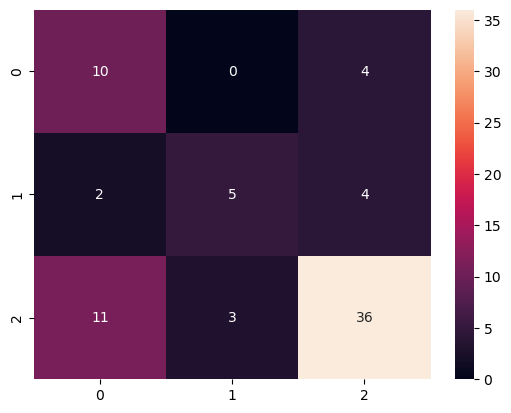

In [34]:
sns.heatmap(conf,annot=True)

## grid search

In [35]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [36]:
grid_search= GridSearchCV(dec_tree,params)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [38]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'random'}

[Text(0.5769230769230769, 0.875, 'x[21] <= 0.628\ngini = 0.573\nsamples = 224\nvalue = [63, 33, 128]'),
 Text(0.3076923076923077, 0.625, 'x[2] <= 56.718\ngini = 0.642\nsamples = 143\nvalue = [52, 30, 61]'),
 Text(0.15384615384615385, 0.375, 'x[26] <= 0.612\ngini = 0.395\nsamples = 33\nvalue = [5, 3, 25]'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'x[6] <= 40.767\ngini = 0.65\nsamples = 110\nvalue = [47, 27, 36]'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'x[4] <= 6.559\ngini = 0.296\nsamples = 81\nvalue = [11, 3, 67]'),
 Text(0.7692307692307693, 0.375, 'x[49] <= 0.206\ngini = 0.25\nsamples = 78\nvalue = [8, 3, 67]'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]')]

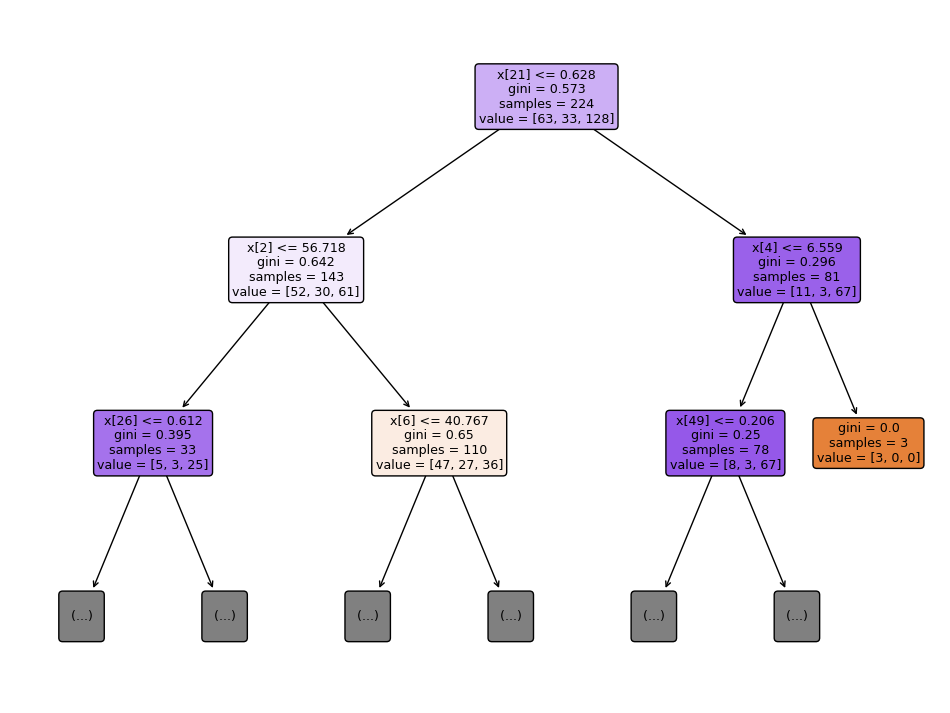

In [39]:

plt.figure(figsize=(12,9))
plot_tree(dec_tree,filled=True,max_depth=2,rounded=True,feature_names=df.get(feat))